# Exercise 4
### Jan Kesting, Felix Fleischle - 19.5.2023 - Group 1 Jeong Yun Choi

Code from the Tutorial:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 26

plt.rc('font', size=SMALL_SIZE, weight='normal')          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
# Define a function for the Hermit Polynomial
def hermit_poly(n,x):
    if n==0:
        out = np.zeros(x.shape[0])
        out[:] = 1
        return out
    elif n == 1:
        return 2*x
    else:
        return (2*x*hermit_poly(n-1,x) - 2*(n-1)*hermit_poly(n-2,x))

In [3]:
from scipy.special import factorial

# Define function for analytical solution of Psy
def Psy(n,x):
    norm = 2**n * factorial(n) * np.sqrt(np.pi)
    norm = np.sqrt(norm)
    return (hermit_poly(n,x)/norm * np.exp(-x**2/2))

In [4]:
# Numerov Algorithm
def numerov(x0, y0, y1, k, n_step, h, k_args={}):
    output = np.zeros((n_step+2,2))
    output[0,:] = [x0, y0]
    output[1,:] = [x0+h,y1]
    
    for i in np.arange(2, n_step+2):
        output[i,0] = output[i-1,0] + h
        y_i = (2.-5./6. * k(output[i-1,0], **k_args) * h**2) * output[i-1,1]
        y_i = y_i - (1. + 1./12. * k(output[i-2,0], **k_args) * h**2) * output[i-2, 1]
        y_i = y_i / (1. + 1./12. * k(output[i,0], **k_args) * h**2)
        output[i,1] = y_i
    return output

Our Code for the new differential equation:

Defining Epsilon as 2mE/hbar^2 and x as z/z0 with z0 = 2 m^2 g / hbar^2

In [5]:
# k(x)

def k_grav(x, epsilon):
    return epsilon - x

def numerov_grav(x_max,h,epsilon):
    
    y0 = 0.
    y1 = 0.3
        
    # Number of iteration steps
    n_steps = int(x_max/h) - 1
    
    return (numerov(x0=0, y0=y0, y1=y1, k=k_grav, n_step=n_steps, h=h, k_args={'epsilon' : epsilon}))

Finding and plotting two epsilons with different asymptotical behavior:

In [6]:
h = 0.05
epsilon2 = 2.0
epsilon1 = 3.1
xmax = 5.
result1 = numerov_grav(xmax, h, epsilon1)
result2 = numerov_grav(xmax, h, epsilon2)

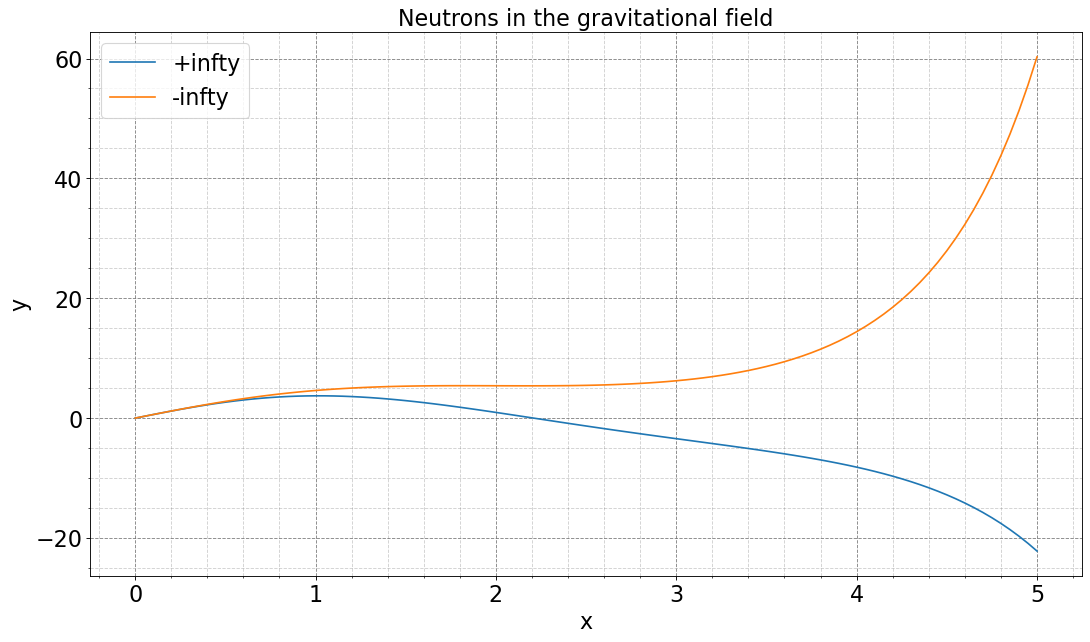

In [7]:
plt.figure(figsize=(16, 9), dpi=80)
plt.plot(result1[:,0], result1[:,1], label='+infty')
plt.plot(result2[:,0], result2[:,1], label='-infty')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Neutrons in the gravitational field')
#plt.yscale('log')
plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
plt.minorticks_on()

#### Finding the eigenvalues:
To find the eigenvalues, we have to find the first three epsilon values where the sign of the convergence switches.

In [8]:
# Finding the first eigenvalue:
# We are just testing values of epsilon and focus closer on the eigenvalue when the sign changes
h = 0.01
epsilon1 = 2.3381
epsilon2 = 2.3382
xmax = 10.
result1 = numerov_grav(xmax, h, epsilon1)
result2 = numerov_grav(xmax, h, epsilon2)

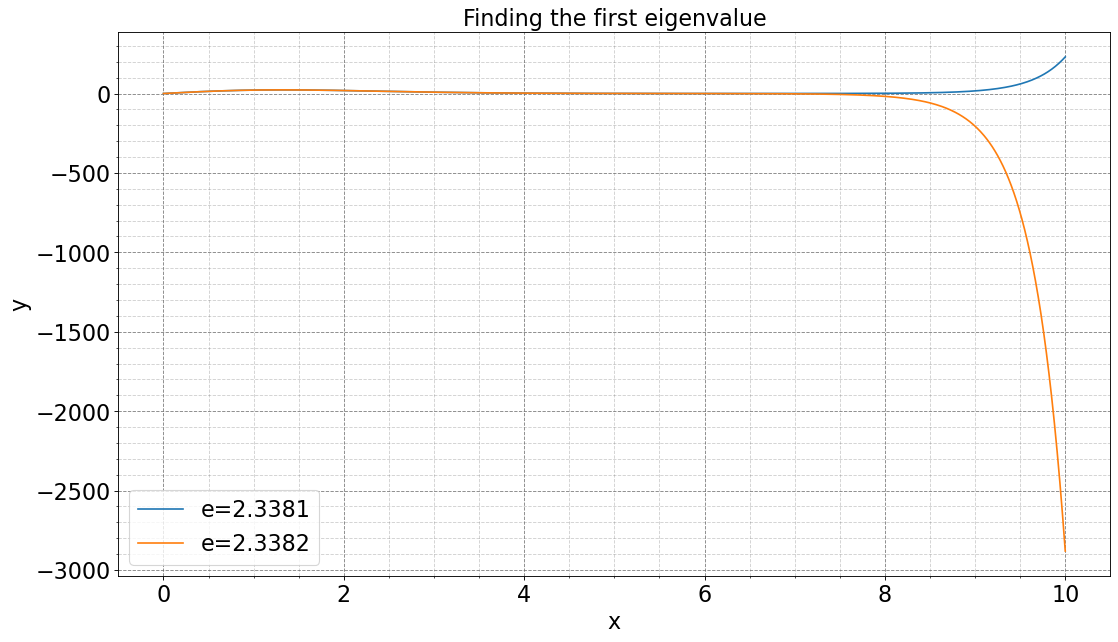

In [9]:
plt.figure(figsize=(16, 9), dpi=80)
plt.plot(result1[:,0], result1[:,1], label='e=2.3381')
plt.plot(result2[:,0], result2[:,1], label='e=2.3382')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Finding the first eigenvalue')
#plt.yscale('log')
plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
plt.minorticks_on()

We can see that the first eigenvalue is between 2.3381 and 2.3382, so approximately 2.34 when rounded to 2 decimals between the comma

In [10]:
# Finding the second eigenvalue:
# We are just testing values of epsilon and focus closer on the eigenvalue when the sign changes
h = 0.01
epsilon1 = 4.087
epsilon2 = 4.088
xmax = 10.
result1 = numerov_grav(xmax, h, epsilon1)
result2 = numerov_grav(xmax, h, epsilon2)

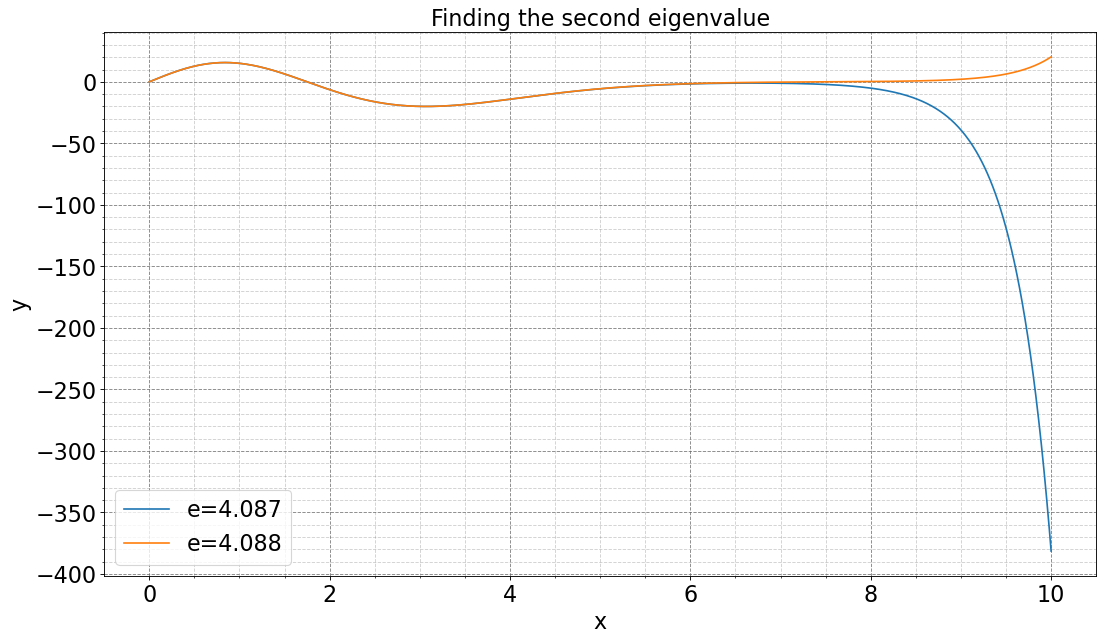

In [11]:
plt.figure(figsize=(16, 9), dpi=80)
plt.plot(result1[:,0], result1[:,1], label='e=4.087')
plt.plot(result2[:,0], result2[:,1], label='e=4.088')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Finding the second eigenvalue')
#plt.yscale('log')
plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
plt.minorticks_on()

The second eigenvalue is between 4.087 and 4.088, so approx. 4.09

In [12]:
# Finding the third eigenvalue:
# We are just testing values of epsilon and focus closer on the eigenvalue when the sign changes
h = 0.01
epsilon1 = 5.520
epsilon2 = 5.521
xmax = 10.
result1 = numerov_grav(xmax, h, epsilon1)
result2 = numerov_grav(xmax, h, epsilon2)

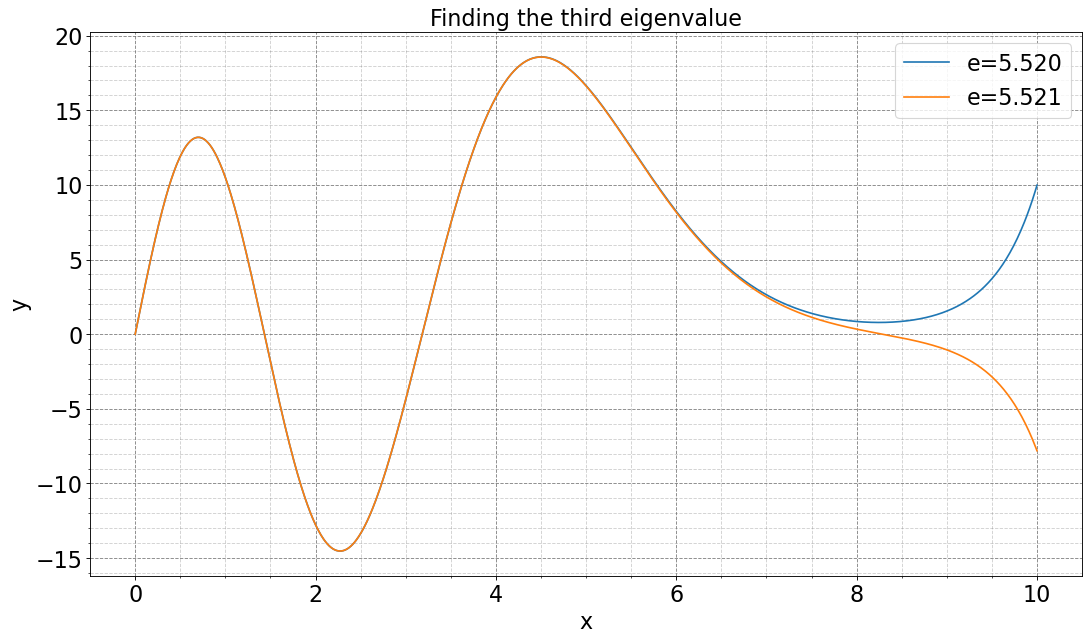

In [13]:
plt.figure(figsize=(16, 9), dpi=80)
plt.plot(result1[:,0], result1[:,1], label='e=5.520')
plt.plot(result2[:,0], result2[:,1], label='e=5.521')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Finding the third eigenvalue')
#plt.yscale('log')
plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
plt.minorticks_on()

The third eigenvalue seems to be between 5.520 and 5.521, so approx. 5.52